In [3]:
from google.colab import files
uploaded = files.upload()


Saving car_evaluation.csv to car_evaluation.csv


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv('car_evaluation.csv', header=None)

In [11]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [12]:
print("First 5 rows:\n", df.head())
print("\nColumns:\n", df.columns)

First 5 rows:
   buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Columns:
 Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [13]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [14]:
X = df.drop('class', axis=1)
y = df['class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [17]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [18]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))

Decision Tree Accuracy: 0.8304431599229287
Random Forest Accuracy: 0.9595375722543352


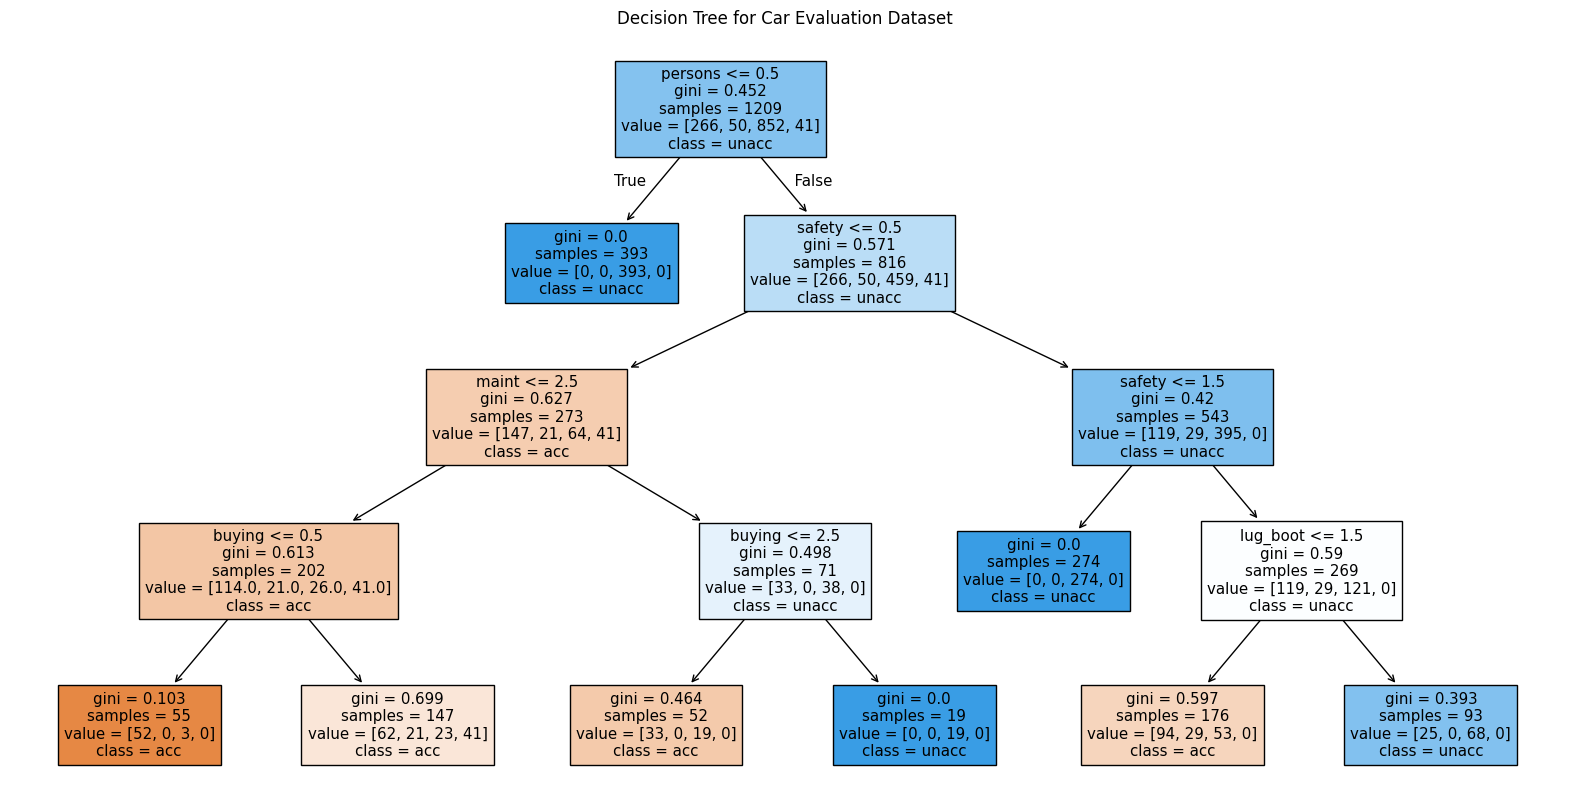

In [19]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree for Car Evaluation Dataset")
plt.show()

In [20]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.92      0.71       118
           1       0.00      0.00      0.00        19
           2       0.97      0.90      0.93       358
           3       0.00      0.00      0.00        24

    accuracy                           0.83       519
   macro avg       0.39      0.45      0.41       519
weighted avg       0.80      0.83      0.81       519



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       118
           1       0.68      0.89      0.77        19
           2       0.99      0.99      0.99       358
           3       0.95      0.88      0.91        24

    accuracy                           0.96       519
   macro avg       0.89      0.92      0.90       519
weighted avg       0.96      0.96      0.96       519

